<a href="https://colab.research.google.com/github/wendyseal/AI-machine-learning/blob/main/Iris_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
#讀取資料集
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["answer"] = iris["target"]
df.to_csv("iris.csv", encoding="utf8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris["data"], iris["target"], test_size=0.1)

In [63]:
# 建立模型 & 訓練資料
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5) #先設定深度(前剪枝)，避免Overfitting 從3-5層開始試，窮舉法嘗試
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
# 檢視feature與target關係(視覺化)
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

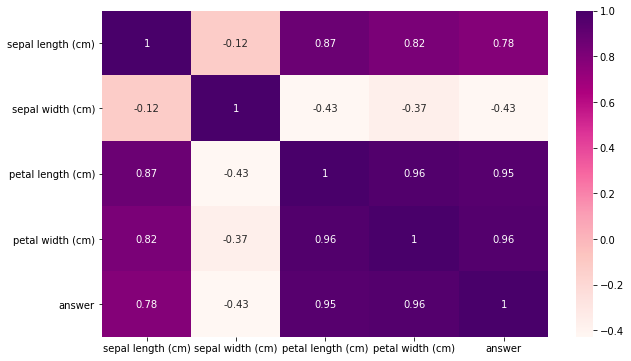

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df.astype(float).corr(), cmap="RdPu", annot=True)
# Choosing Colormaps in Matplotlib

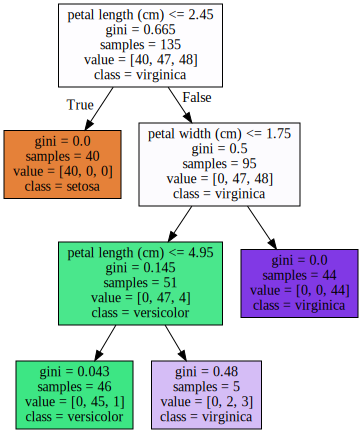

In [66]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(clf, feature_names=iris["feature_names"],
                    class_names=iris["target_names"],
                    filled=True)
graph = graphviz.Source(g)
graph 

sklearn.tree.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)[source]

Gini(純粹程度) 猜錯的機率，要越來越少(每次分割讓亂度越來越低)

Entropy(比較亂度) 

以物理角度來看，一個系統中~一定會趨近穩定，達亂度最高， 但在決策樹中，是[讓資料變的反常態，做出分類]。

舉例:

目前現況：n1:2、n2:3、n3:5

$Gini= \sum_{i=1}^{N}Pi (1-Pi)$
與增益相反(原本亂度-新的亂度)

$ p1(log1-logp1)+p2(log1-logp2)+p3(log1-logp3)$

$Gini =\dfrac{2}{10}(1-\dfrac{2}{10})+\dfrac{3}{10}(1-\dfrac{3}{10})+\dfrac{5}{10}(1-\dfrac{5}{10})=0.62$

In [67]:
# 預測10%測試資料的結果
pre = clf.predict(x_test)
print("預測結果:",pre)
print("真正結果:",y_test)

預測結果: [1 2 0 0 0 0 0 2 0 0 2 0 1 0 0]
真正結果: [1 2 0 0 0 0 0 2 0 0 1 0 1 0 0]


In [68]:
# 衡量model預測準確度
from sklearn.metrics import accuracy_score
print("預測成功機率:", accuracy_score(pre, y_test))

預測成功機率: 0.9333333333333333


In [69]:
# 混淆矩陣檢視 預測結果&真正結果 對照
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pre)

# confusion_matrix = pd.crosstab(y_test, pre, rownames=['Actual'], colnames=['Predicted'])
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2
0,10,0,0
1,0,2,1
2,0,0,2
